In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
import matplotlib

from matplotlib.pyplot import figure

%matplotlib inline
df=pd.read_csv('Ramen_ratings_2020.csv')
df.head()

,ID,URL,Brand,Variety,Style,Country,Stars
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75
3,3470,https://www.theramenrater.com/2020/04/04/3470-...,Myojo,Ippeichan Rich & Sweet Yakisoba,Tray,Japan,5
4,3469,https://www.theramenrater.com/2020/04/03/3469-...,Mykuali,Penang Hokkien Prawn Rice Vermicelli Soup,Bowl,Malaysia,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       3473 non-null   object
 1   URL      3473 non-null   object
 2   Brand    3473 non-null   object
 3   Variety  3473 non-null   object
 4   Style    3473 non-null   object
 5   Country  3473 non-null   object
 6   Stars    3473 non-null   object
dtypes: object(7)
memory usage: 190.1+ KB


In [3]:
df.Stars.value_counts()

5          614
3.75       508
3.5        497
4          412
3.25       215
4.5        210
4.25       199
3          168
2.75       109
2           93
2.5         91
4.75        88
1.5         48
0           38
1           38
1.75        28
2.25        28
0.5         19
0.25        17
1.25        13
Unrated      3
NR           3
2.9          2
3.1          2
1.1          2
2.8          2
4.25/5       2
4.125        2
3.7          1
0.1          1
3.65         1
3.4          1
3.6          1
2.3          1
3.2          1
2.125        1
2.85         1
4.5/5        1
3.125        1
0.9          1
2.1          1
0.75         1
3.50         1
5/4          1
5/2.5        1
5/5          1
4/4          1
3.5/2.5      1
NS           1
1.8          1
Name: Stars, dtype: int64

In [4]:
#filter all meaningless ratings
not_rated=df[df['Stars'].str.contains('Unrated|NS|NR')]
not_rated

,ID,URL,Brand,Variety,Style,Country,Stars
40,3433,https://www.theramenrater.com/2020/02/29/3433-...,Base Foods,Base Noodles,Pack,United States,NS
323,3150,https://www.theramenrater.com/2019/04/18/3150-...,Hakubaku,Baby Somen,Pack,Japan,NR
324,3149,https://www.theramenrater.com/2019/04/16/3149-...,Hakubaku,Baby Udon,Pack,Japan,NR
832,2641,https://www.theramenrater.com/2017/12/06/2642-...,Nanoblock,Ramen Bokki,Pack,Japan,NR
925,2548,https://www.theramenrater.com/2017/09/11/2548-...,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated
1015,2458,https://www.theramenrater.com/2017/05/31/2458-...,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated
1886,1587,https://www.theramenrater.com/2015/02/14/mi-e-...,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated


In [5]:
#delete all meaningless ratings
df=df.drop(not_rated.index)

In [6]:
df = df.reset_index(drop=True)

In [7]:
#delete / in rating
def strip_slash(star):
    if '/' in star:
        return float(star.split('/')[0])
    else:       
        return float(star)

df['Stars'] = df['Stars'].apply(strip_slash)
   


In [8]:
#Round rating number, set values from 1 to 5
df['Stars']=round(df['Stars'],0)

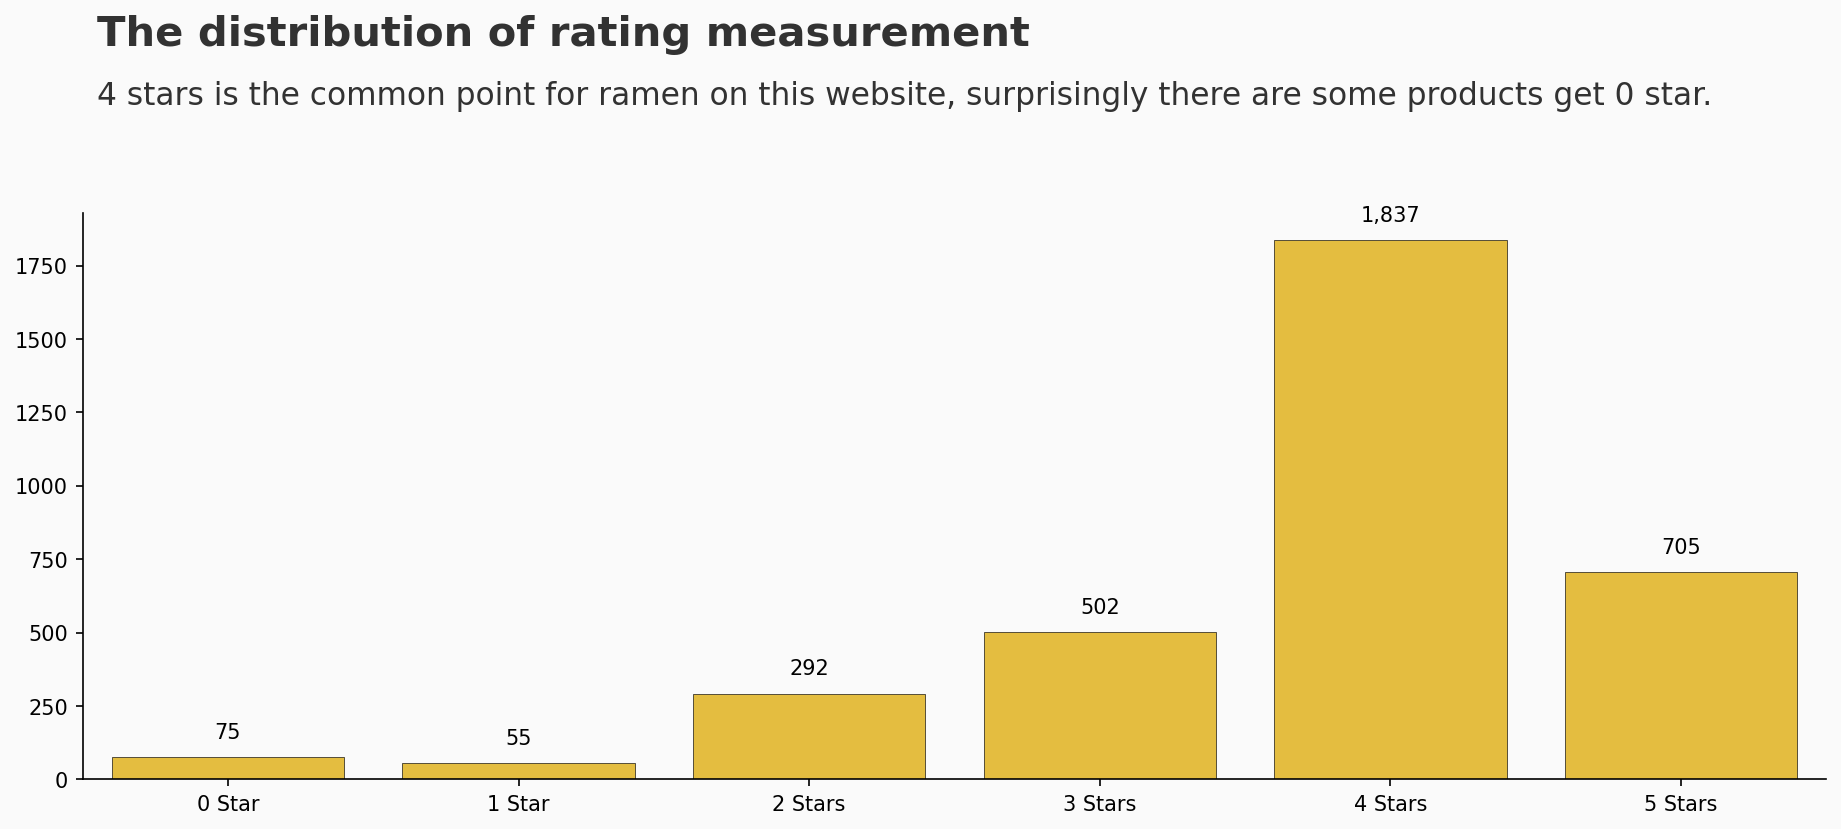

In [9]:
# Plot the graph showing the distribution of rating
fig = plt.figure(figsize=(15,5),dpi=150)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])

# Background color
background_color = "#fafafa"
fig.patch.set_facecolor(background_color) 
ax.set_facecolor(background_color)

# Plots
sns.countplot(x=df['Stars'],edgecolor='black',linewidth=0.3,color='#FFCB25')



for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(['0 Star','1 Star','2 Stars','3 Stars','4 Stars','5 Stars'])

ax.text(-0.45,2500,'The distribution of rating measurement',fontfamily='sans-serif',
         fontsize=20,fontweight='bold',color='#323232')
ax.text(-0.45,2300,'4 stars is the common point for ramen on this website, surprisingly there are some products get 0 star.',
        fontfamily='sans-serif',
         fontsize=15,fontweight='normal',color='#323232')

#Inspriration:https://www.kaggle.com/code/dwin183287/covid-19-world-vaccination/notebook
for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+85
    ax.text(x,y,value, ha='center', va='center', fontsize=10)
plt.show()

In [10]:
#filter unsual style of packaging
unusual_style=df[df['Style'].str.contains('Restaurant|Can|Bar')]
unusual_style

,ID,URL,Brand,Variety,Style,Country,Stars
620,2850,https://www.theramenrater.com/2018/06/09/2850-...,Shibu Ramen,Spicy Garlic Tonkotsu,Restaurant,United States,2.0
622,2848,https://www.theramenrater.com/2018/06/07/resta...,Kizuki Ramen & Izakaya,Shio Ramen,Restaurant,United States,4.0
804,2666,https://www.theramenrater.com/2017/12/25/resta...,Hokkaido Ramen Santouka,Shio Tonkotsu Ramen,Restaurant,United States,5.0
955,2513,https://www.theramenrater.com/2017/08/01/2513-...,Pringles,Nissin Top Ramen Chicken Flavor Potato Crisps,Can,United States,4.0
2311,1155,https://www.theramenrater.com/2013/08/31/1155-...,Komforte Chockolates,Savory Ramen,Bar,United States,5.0


In [11]:
#delete unsual style of packaging
df=df.drop(unusual_style.index)

In [12]:
df = df.reset_index(drop=True)

In [13]:
df['Style'].value_counts()

Pack    1977
Bowl     671
Cup      607
Tray     156
Box       50
Name: Style, dtype: int64

In [14]:
df[df['Style'].str.contains('Box')][:5]

,ID,URL,Brand,Variety,Style,Country,Stars
44,3428,https://www.theramenrater.com/2020/02/22/3428-...,Wu Mu,Mandashi Sakura Shrimp Scallion Oil Noodle,Box,Taiwan,4.0
66,3406,https://www.theramenrater.com/2020/01/31/3406-...,Street Noodles,Teriyaki,Box,United States,4.0
80,3392,https://www.theramenrater.com/2020/01/19/3392-...,Wu Mu,Mandashi Mala Spicy Noodle,Box,Taiwan,5.0
111,3361,https://www.theramenrater.com/2019/12/15/3361-...,Liang Cheng Mai,Sao Zi Mian,Box,China,4.0
120,3352,https://www.theramenrater.com/2019/12/06/3352-...,A-Sha,Rainbow Noodles,Box,Taiwan,5.0


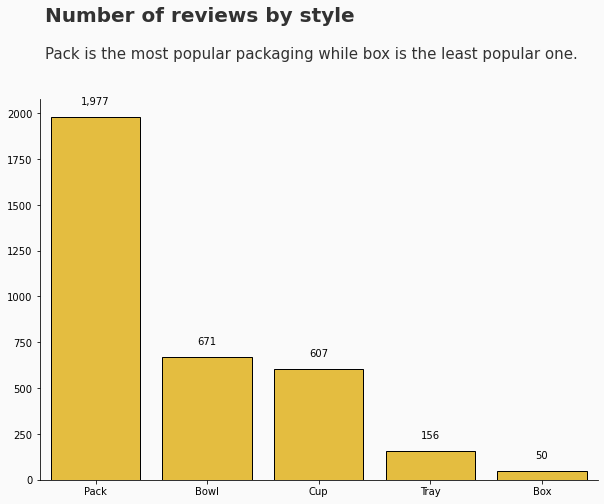

In [15]:
#plot the distribution of style of package

#setting
fig = plt.figure(figsize=(10,7))
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])

#background color
background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax.set_facecolor(background_color)

#color map
color_map=['#FFCB25' for _ in range(5)]

#plot
sns.countplot(data=df,x='Style',ax=ax,palette=color_map,order=['Pack','Bowl','Cup','Tray','Box'],zorder=2,edgecolor='black')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.text(-0.45,2500,'Number of reviews by style',fontfamily='sans-serif',
         fontsize=20,fontweight='bold',color='#323232')
ax.text(-0.45,2300,'Pack is the most popular packaging while box is the least popular one. ',
        fontfamily='sans-serif',
         fontsize=15,fontweight='normal',color='#323232')
ax.set_xlabel('')
ax.set_ylabel('')

# Inspriration:https://www.kaggle.com/code/dwin183287/covid-19-world-vaccination/notebook
for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+85
    ax.text(x,y,value, ha='center', va='center', fontsize=10)
plt.show()


In [16]:
#Code:https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

import pycountry
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
            

In [17]:
df['CODE']=alpha3code(df['Country'])
df.head()

,ID,URL,Brand,Variety,Style,Country,Stars,CODE
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5.0,MYS
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5.0,MYS
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,4.0,None
3,3470,https://www.theramenrater.com/2020/04/04/3470-...,Myojo,Ippeichan Rich & Sweet Yakisoba,Tray,Japan,5.0,JPN
4,3469,https://www.theramenrater.com/2020/04/03/3469-...,Mykuali,Penang Hokkien Prawn Rice Vermicelli Soup,Bowl,Malaysia,5.0,MYS


In [18]:
#find lists of name and index of countries without CODE
not_found_country=[]
index=[]
for i in range(len(df)):
    if df.CODE[i]=='None':
        not_found_country.append(df['Country'][i])
        index.append(i)

In [19]:
#names of countries without CODE
distinct_values = list(set(not_found_country))
print(distinct_values)


['South Korea', 'Souh Korea', 'Russia', 'UK', 'Phlippines', 'Holland', 'USA', 'Sarawak', 'Vietnam', 'Dubai', 'Taiwan']


In [20]:
#find CODE for missing countries
def change_to_CODE(country_list):
    not_found_country_CODE=[]
    for c in country_list:
        if c=='USA':
            right_code='USA'
            not_found_country_CODE.append(right_code)
        elif c=='Dubai':
            right_code='ARE'
            not_found_country_CODE.append(right_code)
        
        elif c=='South Korea' or c=='Souh Korea':
            right_code='KOR'
            not_found_country_CODE.append(right_code)
        elif c=='Sarawak':
            right_code='MYS'
            not_found_country_CODE.append(right_code)
        elif c=='Holland':
            right_code='NLD'
            not_found_country_CODE.append(right_code)
        elif c=='Russia':
            right_code='RUS'
            not_found_country_CODE.append(right_code)
        elif c=='Phlippines':
            right_code='PHL'
            not_found_country_CODE.append(right_code)
        elif c=='Taiwan':
            right_code='TWN'
            not_found_country_CODE.append(right_code)
        elif c=='Vietnam':
            right_code='VNM'
            not_found_country_CODE.append(right_code)
        
        else:
            right_code='GBR'
            not_found_country_CODE.append(right_code)
    
            
    return not_found_country_CODE


In [21]:
found_country_CODE=change_to_CODE(not_found_country)

In [22]:
#Convert to right country name
df['Country']=df['Country'].replace({'Souh Korea': 'South Korea', 'Phlippines': 'Philippines','UK':'United Kingdom','USA':'United States'})

In [23]:
for i in range(len(index)):
    df.CODE.iloc[index[i]]=found_country_CODE[i]

C:\Users\Admin\AppData\Local\Temp\ipykernel_3780\631518329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CODE.iloc[index[i]]=found_country_CODE[i]


In [24]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge=pd.merge(world,df,on='CODE')

In [25]:
country_count=df['CODE'].value_counts().reset_index()
country_count.columns=['CODE','Count']
country_count.head()

,CODE,Count
0,JPN,626
1,USA,423
2,KOR,394
3,TWN,357
4,CHN,221


In [26]:
merged_df = pd.merge(country_count[['CODE', 'Count']],world[['CODE','name', 'geometry']], on='CODE')
merged_df = geopandas.GeoDataFrame(merged_df, geometry='geometry')
merged_df=pd.concat([merged_df, merged_df.bounds], axis=1)
merged_df.head()

,CODE,Count,name,geometry,minx,miny,maxx,maxy
0,JPN,626,Japan,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",129.408463,31.029579,145.543137,45.551483
1,USA,423,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",-171.791111,18.916190,-66.964660,71.357764
2,KOR,394,South Korea,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",126.117398,34.390046,129.468304,38.612243
3,TWN,357,Taiwan,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",120.106189,21.970571,121.951244,25.295459
4,CHN,221,China,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",73.675379,18.197701,135.026311,53.458800


In [27]:
# Find the coordinates of country where each product was produced.
# Code:https://shaunastbury.com/creating-a-dot-density-map/
import random
from shapely.geometry import Point

def random_coordinates(row):
    results = []
    count = 0
    val=row['Count']
    
    while count < val:
        x = random.uniform(row['minx'], row['maxx'])
        y = random.uniform(row['miny'], row['maxy'])
        pt = Point(x, y)
        if pt.within(row['geometry']):
            count += 1
            results.append([row['name'], x, y])
    return pd.DataFrame(results, columns=('Country', 'x', 'y'))

# Apply the function to every row of the data frame, returning a series with a data frame for each row.
results = merged_df.apply(random_coordinates, axis=1)

# Unpack the series and concatenate the data frames.
results = pd.concat(results.tolist(), ignore_index=True)


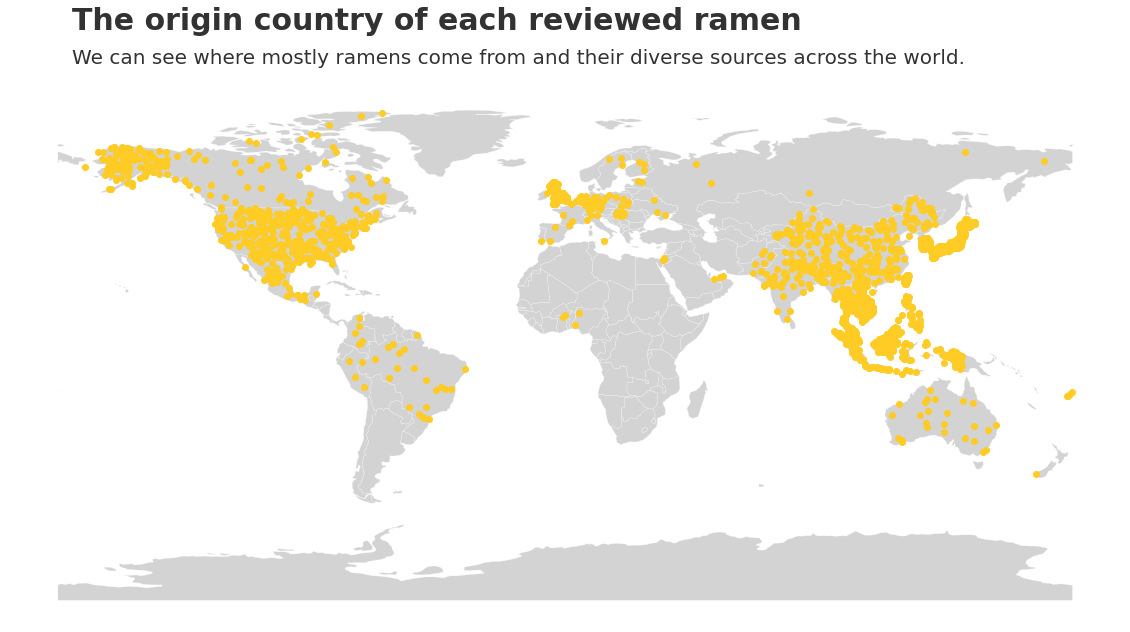

In [28]:
#Plot the world map of origin of countries for each reviewed ramen
ax = world.plot(figsize=(20,15), linewidth=0.25, edgecolor=background_color, color='lightgray')
ax.axis('off')
ax.set_facecolor(background_color)
ax.scatter(results['x'], results['y'], color='#FFCB25')


ax.text(-175,112,'The origin country of each reviewed ramen',fontsize=30,fontweight='bold',
        fontfamily='sans-serif',color='#323232')
ax.text(-175,100,'We can see where mostly ramens come from and their diverse sources across the world.',fontsize=20,fontweight='normal',
        fontfamily='sans-serif',color='#323232')



plt.show()

In [ ]:
# Create a word cloud for variety to find common flavors
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text="".join(df['Variety'].values)
def make_wordcloud(new_text):
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(["noodle", "Noodle","Noodles","Flavour", "ramen","Ramen", "flavor", "flavors","Instant"])
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords,width=800,height=800,min_font_size=10,
    background_color="white",colormap="Set2",collocation_threshold=3).generate(text)
    fig = plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

    return fig

text_cloud = make_wordcloud(text)

In [ ]:
#top 5 brands with the largest number of products
brand_products=df.groupby('Brand')['Variety'].nunique().sort_values(ascending=False)[:5].reset_index()
brand_products.columns=['Brand','Product']

background_color = "#f6f5f5"
fig = plt.figure(figsize=(15, 5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor(background_color)




color_map=['#FFCB25' for _ in range(5)]


ax.text(0, -1, 'Top Ramen Brands by Quantity of Products', color='black', fontsize=20, ha='left', va='bottom', weight='bold')
ax.text(0, -0.93, 'Nissin is the most popular ramen brand with over 400 products all over the world.', color='#292929', fontsize=12, ha='left', va='top')
sns.barplot(ax=ax, y=brand_products['Brand'], x=brand_products['Product'], zorder=2, palette=color_map,orient='h',
                      linewidth=0.3, edgecolor='black', saturation=1)
ax.set_xlabel("Number of products",fontsize=10, weight='normal')
ax.set_ylabel('')

for s in ["right", "top"]:
    ax.spines[s].set_visible(False)

ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

#Code:https://www.kaggle.com/code/dwin183287/covid-19-world-vaccination/notebook
for p in ax.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 14
    y = p.get_y() + p.get_height() / 2 
    ax.text(x,y,value, ha='center', va='center', fontsize=14,fontweight='light') 
            

for i in range(5):
    value = list(brand_products['Brand'])[i]
    x = brand_products['Product'][i]-brand_products['Product'][i]*0.02
    y = i
    ax.text(x,y,value, ha='right', va='center', fontsize=15,fontweight='normal',color='black'
            )

plt.show()




In [ ]:
# Filter brands by average rating and number of reviews.
brand_rating=df.groupby(['Brand']).Stars.agg(['mean','count']).reset_index()
brand_rating.columns=['Brand','Average rating','Number of reviews']
brand_rating

In [ ]:
#Table shows average rating and number of reviews for top 5 brands
brand_rating['Average rating']=round(brand_rating['Average rating'],2)
brand_rating=brand_rating.sort_values(by=['Number of reviews','Average rating'],ascending=False)[:5]
brand_rating

In [ ]:
# Plot the table to show average rating and number of reviews for top 5 brands
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Table(header=dict(values=brand_rating.columns,fill_color='grey',
                         height=30,
                         align=['left','center','center'],
                         font=dict(color='white', size=12)), 
             cells=dict(values=brand_rating.head(5).T,fill_color='white',
                        height=25,
                        font_size=11,
                        line_color='lightgrey',
                        align=['left','center','center'])
))

fig.show()

In [ ]:
# Top 10 country with the largest number of products:
country_products=df.groupby('Country')['Variety'].nunique().sort_values(ascending=False)[:10].reset_index()
country_products.columns=['Country','Product']

background_color = "#f6f5f5"
fig = plt.figure(figsize=(15, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor(background_color)

color_map=['#FFCB25' for _ in range(5)]
ax.text(0, -2, 'Countries have the most ramen products', color='black', fontsize=25, ha='left', va='bottom', weight='bold')
ax.text(0, -1.6, 'Japan leads the way in this competition with the highest number of unique ramen products compared to other countries.', color='#292929', fontsize=15, ha='left', va='top')
sns.barplot(ax=ax, y=country_products['Country'], x=country_products['Product'], zorder=2, palette=color_map,orient='h',
                      linewidth=0.3, edgecolor='black', saturation=1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.axes.get_xaxis().set_ticks([])

# Get the y-axis tick labels and set their font properties
y_tick_labels = ax.get_yticklabels()
for label in y_tick_labels:
    label.set_fontweight('normal')
    label.set_fontsize(14)

for s in ["right", "top","left","bottom"]:
    ax.spines[s].set_visible(False)
ax.tick_params(axis = "y", which = "both", left = False)
ax.tick_params(labelsize=14)

for p in ax.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width()-2
    y = p.get_y() + p.get_height() / 2 
    ax.text(x,y,value, ha='right', va='center', fontsize=10,fontweight='normal')
    

plt.show()



In [ ]:
# Extract the date from URL
import re
def date_extract(url):
    date=re.search('(?<=\/)(\d{4}\/\d{2}\/\d{2})(?=\/)',url)
    if date:
        return date.group()
    else:
        return None
df['date_review']=df['URL'].apply(date_extract)

In [ ]:
df['date_review'].tail()

In [ ]:
df_copy=df.copy()
df_copy.head()

In [ ]:
# Extract the month
df_copy['month']=df_copy['date_review'].apply(lambda x:x[5:7])
df_copy['month']

In [ ]:
# Extract the year
df_copy['year']=df_copy['date_review'].apply(lambda x:x[0:4])
df_copy['year']

In [ ]:
# Remove years having incompleted data
remove_year=df_copy[df_copy['year'].isin(['2020','2009'])]
remove_year                    

In [ ]:
df_copy=df_copy.drop(remove_year.index)


In [ ]:
# Number of reviews by month
monthly_reviews=df_copy['month'].value_counts().sort_values( ascending=False).reset_index()
monthly_reviews.columns=['Month','Count']

In [ ]:
monthly_reviews

In [ ]:
# Sort by ascending months.
monthly_reviews=monthly_reviews.sort_values(by='Month', ascending=True)
monthly_reviews

In [ ]:
# Plot the graph of number of reviews by month
background_color = "#f6f5f5"
fig = plt.figure(figsize=(15, 7), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor(background_color)

ax.plot(monthly_reviews['Month'], monthly_reviews['Count'],
       color='#FFCB25',
       linewidth=2)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
ax.set_ylim(200,375)
ax.set_xlim(-1,12)

for s in ["right", "top"]:
    ax.spines[s].set_visible(False)

ax.hlines(max(monthly_reviews.Count), xmin=-1, xmax=monthly_reviews.Month[0],linestyle='--', color='#F36E8E')
ax.hlines(min(monthly_reviews.Count), xmin=-1, xmax=monthly_reviews.Month[11],linestyle='--', color='#1ABDE9')

ax.text(monthly_reviews.Month[0],max(monthly_reviews.Count)+0.5,s=f'{max(monthly_reviews.Count)}',fontweight='bold',
         va='bottom', ha='center',color='#F36E8E')
ax.text(monthly_reviews.Month[11],min(monthly_reviews.Count)-7,s=f'{min(monthly_reviews.Count)}',fontweight='bold',
         va='bottom', ha='center',color='#1ABDE9')
ax.set_title(f"Number of reviews by month from 2010-2019.", fontsize=20,va= 'center', fontweight='bold')
plt.show()